In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
x=pd.read_csv("KONKAN & GOA.csv")


In [3]:
columns_to_drop = ["Unnamed: 0"]
data_clean = x.drop(columns_to_drop,axis = 1)
x = data_clean


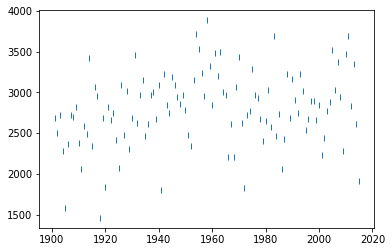

In [4]:
y1=list(x["YEAR"])
x1=list(x["Jun-Sep"])
z1=list(x["JUN"])
w1=list(x["MAY"])

plt.plot(y1, x1,'|')
plt.show()

In [5]:
flood=[]
june=[]
sub=[]
#APPROAXIMATELY FINDING THE RAINFALL DATA FOR 10 DAYS FOR THE MONTH OF JUNE IN EVERY YEAR FROM 1901 TO 2015
for k in range(0,len(x1)):
    june.append(z1[k]/3)

#FINDING THE INCREASE IN RAINFALL FROM THE MONTH OF MAY TO THE MONTH OF JUNE IN EVERY YEAR FROM 1901 TO 2015
for k in range(0,len(x1)):
    sub.append(abs(w1[k]-z1[k]))


#CREATING A NEW COLOUMN WITH BINARY CLASSIFICATION DEPENDING IF THAT YEAR HAD FLOODED OR NOT, USING RAINFALL OF THAT YEAR AS THRESHOLD
#flood,rain,heavy rain
for i in range(0,len(x1)):
    if x1[i]>2500 or june[i] > 300 or sub[i] > 1000:
        flood.append('1')
    elif x1[i] < 1500  or june[i] < 100  or sub[i] < 300:
        flood.append('0')
    else:
        flood.append('-1')





df = pd.DataFrame({'flood':flood})
df1=pd.DataFrame({'per_10_days':june})

x["flood"]=flood
x["avgjune"]=june
x["sub"]=sub

#SAVING THE NEW CSV FILE WITH THE NEW COLOUMNS
x.to_csv("out1.csv")
print((x))
        
        
      

      SUBDIVISION  YEAR   JAN   FEB   MAR   APR    MAY     JUN     JUL  \
0    KONKAN & GOA  1901   5.6   0.1   0.4  35.7   19.9   746.1  1075.5   
1    KONKAN & GOA  1902   0.3   0.0   0.0   0.4    7.6   428.2   943.6   
2    KONKAN & GOA  1903   0.0   0.0   0.1   0.0  201.1   470.5  1298.6   
3    KONKAN & GOA  1904   0.0   0.1   6.6   6.3    4.6   975.8   771.7   
4    KONKAN & GOA  1905   0.1   0.1   0.0   0.4    8.6   293.7   770.6   
5    KONKAN & GOA  1906   5.0   0.9   0.0   0.0    2.9   547.4  1090.9   
6    KONKAN & GOA  1907   1.7   1.0   0.0  20.1    0.0   583.1  1170.9   
7    KONKAN & GOA  1908   0.9   1.1   0.0   2.3    1.0   440.0  1391.8   
8    KONKAN & GOA  1909   0.1   0.0   0.1   0.3    7.8   759.5  1301.8   
9    KONKAN & GOA  1910   0.0   0.0   0.3   0.0    2.6   832.4   407.8   
10   KONKAN & GOA  1911   0.2   0.0   3.2   0.0   17.1   543.6   585.6   
11   KONKAN & GOA  1912   0.0   0.0   0.0   4.1   28.9   671.0  1242.9   
12   KONKAN & GOA  1913   0.0   0.0   

In [6]:

import scipy 
from scipy.stats import spearmanr

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [7]:
#TAKING THE COLOUMNS WHICH ARE TO USED FOR TRAINING THE MODEL
#16 MAR-MAY
#20- AVG OF 10 DAYS JUNE 
#21- DIFFERENCE OF RAINFALL FROM MAY TO JUNE
#19 - BINARY CLASS OF FLOOD- 0 OR 1 or -1
#MORE DATA CAN BE ADDED FOR TRAINING, BY JUST ADDING MORE NUMBER OF COLOUMNS FROM THE CSV FILE

#WE USE LOGISTIC REGRESSION FOR TRAINING
X = x.ix[:,{16,20,21}].values
y1=x.ix[:,19].values
(X_train, X_test, Y_train, Y_test) = train_test_split(X, y1, random_state=0)


c:\users\rahul\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
c:\users\rahul\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


In [8]:
Lr=LogisticRegression()

Lr.fit(X,y1)
print(Lr.score(X_test,Y_test)) 


0.7241379310344828


c:\users\rahul\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\rahul\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [9]:
np.unique(y1)

array(['-1', '0', '1'], dtype=object)

In [10]:
import pickle
Pkl_Filename = "Goa.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(Lr, file)